In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
# from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
# Mount GDrive
# drive.mount('/content/Drive')

In [3]:
# Load dataset
df = pd.read_csv('./Dataset/Salary_Data.csv')

In [4]:
# Inspect data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [5]:
X = df['YearsExperience']
y = df['Salary']

In [6]:
X = X[:,np.newaxis]

C:\Users\Home\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [7]:
param = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

In [8]:
svr = SVR()

In [9]:
grid_search = GridSearchCV(svr, param)
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [10]:
grid_search.best_params_

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}

In [11]:
reg = SVR(C=100000, gamma=0.005, kernel='rbf')
reg.fit(X,y)

SVR(C=100000, gamma=0.005)

In [12]:
reg.score(X,y)

0.9610212564451518

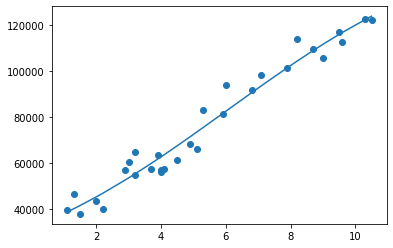

In [13]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X))
plt.show()